<a href="https://colab.research.google.com/github/msamir-dls/DDPM_MNIST/blob/main/trial.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
!git clone https://github.com/msamir-dls/DDPM_MNIST.git

fatal: destination path 'DDPM_MNIST' already exists and is not an empty directory.


In [2]:
%cd DDPM_MNIST

/content/DDPM_MNIST


In [3]:
!pip install -r requirements.txt

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 40.1/40.1 kB 4.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 9.7/9.7 MB 117.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.8/2.8 MB 93.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.4/1.4 MB 91.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 147.8/147.8 kB 18.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 114.9/114.9 kB 6.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 85.0/85.0 kB 11.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 77.0/77.0 kB 10.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 66.5/66.5 kB 9.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 131.2/131.2 kB 18.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 796.9/796.9 kB 52.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 207.3/207.3 kB 26.8 MB/s eta 0:00:00
  Attempting uninstall: packaging
    Found exis

In [ ]:
from src.utils import *

In [ ]:
device = get_device()

In [ ]:
device

device(type='cuda')

In [ ]:
import sys
sys.path.append('/content/DDPM_MNIST')
sys.path.append('/content/DDPM_MNIST/src')

In [ ]:
!python train_ddpm.py

[*] Loaded configuration from configs/ddpm_train.yaml
DEBUG: num_workers = 0
DEBUG: batch_size = 128
[*] Using device: cuda
/usr/local/lib/python3.12/dist-packages/mlflow/tracking/_tracking_service/utils.py:178: FutureWarning: The filesystem tracking backend (e.g., './mlruns') will be deprecated in February 2026. Consider transitioning to a database backend (e.g., 'sqlite:///mlflow.db') to take advantage of the latest MLflow features. See https://github.com/mlflow/mlflow/issues/18534 for more details and migration guidance. For migrating existing data, https://github.com/mlflow/mlflow-export-import can be used.
  return FileStore(store_uri, store_uri)
2026/02/09 18:25:18 INFO mlflow.tracking.fluent: Experiment with name 'MNIST_Diffusion' does not exist. Creating a new experiment.
100% 9.91M/9.91M [00:00<00:00, 16.0MB/s]
100% 28.9k/28.9k [00:00<00:00, 475kB/s]
100% 1.65M/1.65M [00:00<00:00, 4.49MB/s]
100% 4.54k/4.54k [00:00<00:00, 12.6MB/s]
[*] Model Parameters: Total=3,372,737, Trainab

In [3]:
!mkdir checkpoints

In [4]:
!python ddim_inference.py

 DDIM Configuration:
   - Sampling steps: 50
   - Timesteps: 1000
 Loaded model from checkpoints/ddpm_final.pth

 Generating 16 samples...
 DDIM Sampling: 50 steps (vs 1000 for DDPM)
DDIM Sampling: 100% 50/50 [00:01<00:00, 35.28it/s]
Figure(1000x1000)

 DDIM generation complete!
   - Generated 16 samples
   - Saved to: ddim_outputs/ddim_samples.png
   - Check 'ddim_outputs/' folder


In [5]:
!python quick_ddim_test.py

 Quick DDIM Test
Traceback (most recent call last):
  File "/content/DDPM_MNIST/quick_ddim_test.py", line 76, in <module>
    quick_test()
  File "/content/DDPM_MNIST/quick_ddim_test.py", line 30, in quick_test
    model.load_state_dict(checkpoint['model_state_dict'])
  File "/usr/local/lib/python3.12/dist-packages/torch/nn/modules/module.py", line 2629, in load_state_dict
    raise RuntimeError(
RuntimeError: Error(s) in loading state_dict for UNet:
	Unexpected key(s) in state_dict: "time_mlp.0.inv_freq". 


In [6]:
# quick_ddim_test.py
import torch
import torchvision
import sys
import os
import time
sys.path.append('.')

from src.models.unet import UNet
from src.schedulers.ddim_solver import DDIM
from src.schedulers.gaussian import GaussianDiffusion
from src.utils import load_config

def quick_test():
    """Quick test to verify DDIM works with your trained model"""
    print(" Quick DDIM Test")
    print("=" * 50)

    # Load config
    try:
        config = load_config("configs/ddpm_train.yaml")
    except:
        print("  Using default config")
        config = {
            'dataset': {'img_size': 32, 'channels': 1},
            'model': {
                'base_channels': 32,
                'channel_mult': [1, 2, 4],
                'num_res_blocks': 2,
                'attention': [False, False, False],
                'dropout': 0.1
            },
            'diffusion': {
                'timesteps': 1000,
                'beta_start': 0.0001,
                'beta_end': 0.02,
                'schedule': 'linear'
            },
            'train': {
                'device': 'cuda'
            }
        }

    # Add DDIM settings
    config['ddim'] = {
        'sampling_steps': 50,
        'eta': 0.0
    }

    # Set device
    if torch.cuda.is_available():
        device = torch.device('cuda')
        print(" Using CUDA (GPU)")
    elif hasattr(torch.backends, 'mps') and torch.backends.mps.is_available():
        device = torch.device('mps')
        print(" Using MPS (Apple Silicon GPU)")
    else:
        device = torch.device('cpu')
        print("  Using CPU (slow)")

    # Load model
    print(" Loading trained model...")
    model = UNet(config).to(device)

    checkpoint_path = 'checkpoints/ddpm_final.pth'
    if os.path.exists(checkpoint_path):
        checkpoint = torch.load(checkpoint_path, map_location=device)

        # Load with strict=False to handle architecture differences
        if 'model_state_dict' in checkpoint:
            model.load_state_dict(checkpoint['model_state_dict'], strict=False)
        else:
            model.load_state_dict(checkpoint, strict=False)

        model.eval()
        print(f" Model loaded (trained for {checkpoint.get('epoch', 'N/A')} epochs)")
    else:
        print(" No checkpoint found. Using random weights for testing.")
        model.eval()

    # Initialize DDIM
    print(" Initializing DDIM scheduler...")
    ddim = DDIM(config).to(device)

    # Generate samples
    print(f"\n Testing DDIM with {ddim.ddim_timesteps} steps...")

    with torch.no_grad():
        sample_shape = (4, config['dataset']['channels'],
                       config['dataset']['img_size'],
                       config['dataset']['img_size'])
        samples = ddim.sample(model, sample_shape)
        samples = (samples.clamp(-1, 1) + 1) / 2

        # Save
        torchvision.utils.save_image(samples, 'ddim_quick_test.png', nrow=2)

    print(f" DDIM test complete! Check 'ddim_quick_test.png'")

    # Display samples
    try:
        import matplotlib.pyplot as plt
        import numpy as np

        print("\n  Displaying generated samples...")
        grid = torchvision.utils.make_grid(samples.cpu(), nrow=2, padding=2)
        plt.figure(figsize=(8, 8))
        plt.imshow(grid.permute(1, 2, 0).numpy().squeeze(), cmap='gray')
        plt.title(f'DDIM Samples ({ddim.ddim_timesteps} steps)')
        plt.axis('off')
        plt.tight_layout()
        plt.show()
    except ImportError:
        print("  matplotlib not installed. Check 'ddim_quick_test.png'")

    # Compare with DDPM
    print(f"\n⚡ Speed comparison:")

    # Reduce DDPM steps for quick comparison
    config_short = config.copy()
    config_short['diffusion']['timesteps'] = 100  # Only 100 steps for speed test

    ddpm = GaussianDiffusion(config_short).to(device)

    # DDIM timing (50 steps)
    print("   Timing DDIM (50 steps)...")
    start = time.time()
    with torch.no_grad():
        ddim_samples = ddim.sample(model, sample_shape)
    ddim_time = time.time() - start

    # DDPM timing (100 steps)
    print("   Timing DDPM (100 steps)...")
    start = time.time()
    with torch.no_grad():
        ddpm_samples = ddpm.sample(model, sample_shape)
    ddpm_time = time.time() - start

    print(f"\n Results:")
    print(f"   DDPM ({ddpm.timesteps} steps): {ddpm_time:.2f}s")
    print(f"   DDIM ({ddim.ddim_timesteps} steps): {ddim_time:.2f}s")
    print(f"   Speedup: {ddpm_time/ddim_time:.1f}x faster!")

    # Generate comparison grid
    try:
        print("\n Creating comparison visualization...")

        # Take first sample from each
        ddpm_sample = (ddpm_samples[0].clamp(-1, 1) + 1) / 2
        ddim_sample = (ddim_samples[0].clamp(-1, 1) + 1) / 2

        # Create comparison grid
        comparison = torch.cat([ddpm_sample.unsqueeze(0), ddim_sample.unsqueeze(0)], dim=0)
        torchvision.utils.save_image(comparison, 'ddim_vs_ddpm.png', nrow=2)

        # Display comparison
        plt.figure(figsize=(10, 5))

        plt.subplot(1, 2, 1)
        plt.imshow(ddpm_sample.cpu().permute(1, 2, 0).squeeze(), cmap='gray')
        plt.title(f'DDPM\n{ddpm.timesteps} steps\n{ddpm_time:.2f}s')
        plt.axis('off')

        plt.subplot(1, 2, 2)
        plt.imshow(ddim_sample.cpu().permute(1, 2, 0).squeeze(), cmap='gray')
        plt.title(f'DDIM\n{ddim.ddim_timesteps} steps\n{ddim_time:.2f}s')
        plt.axis('off')

        plt.suptitle(f'DDPM vs DDIM Comparison (Speedup: {ddpm_time/ddim_time:.1f}x)', fontsize=14)
        plt.tight_layout()
        plt.savefig('ddim_comparison.png', dpi=150, bbox_inches='tight')
        plt.show()

        print(f" Comparison saved to 'ddim_comparison.png'")

    except Exception as e:
        print(f"  Could not create comparison: {e}")

    return samples, ddim_time, ddpm_time

# if __name__ == "__main__":
#     samples, ddim_time, ddpm_time = quick_test()

 Quick DDIM Test
 Using CUDA (GPU)
 Loading trained model...
 Model loaded (trained for 20 epochs)
 Initializing DDIM scheduler...

 Testing DDIM with 50 steps...
 DDIM Sampling: 50 steps (vs 1000 for DDPM)


DDIM Sampling: 100%|██████████| 50/50 [00:00<00:00, 63.91it/s]


 DDIM test complete! Check 'ddim_quick_test.png'

  Displaying generated samples...


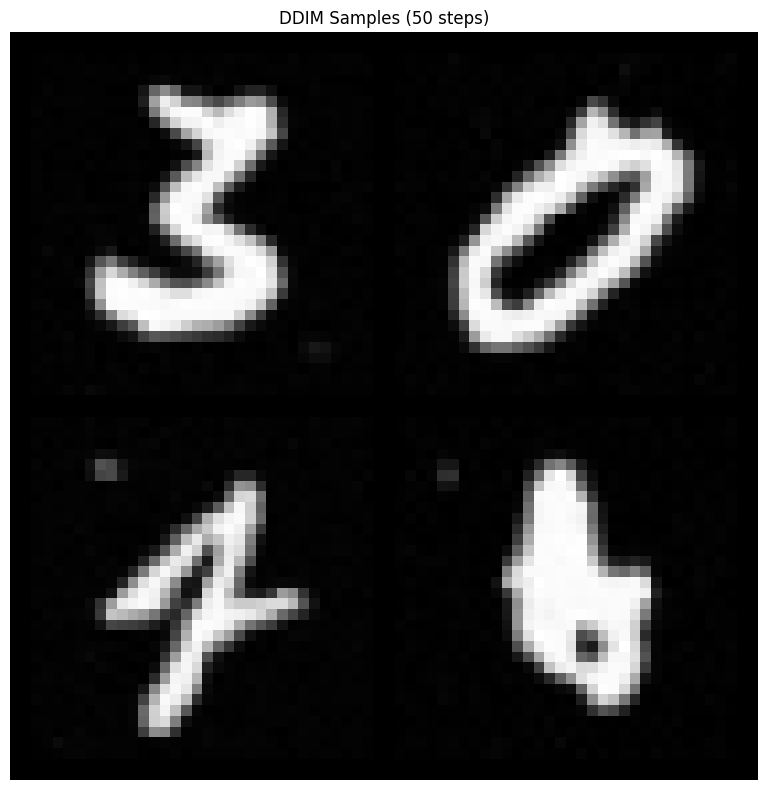


⚡ Speed comparison:
   Timing DDIM (50 steps)...
 DDIM Sampling: 50 steps (vs 1000 for DDPM)


DDIM Sampling: 100%|██████████| 50/50 [00:00<00:00, 108.29it/s]


   Timing DDPM (100 steps)...


DDPM Sampling: 100%|██████████| 100/100 [00:00<00:00, 108.76it/s]



 Results:
   DDPM (100 steps): 0.92s
   DDIM (50 steps): 0.47s
   Speedup: 2.0x faster!

 Creating comparison visualization...


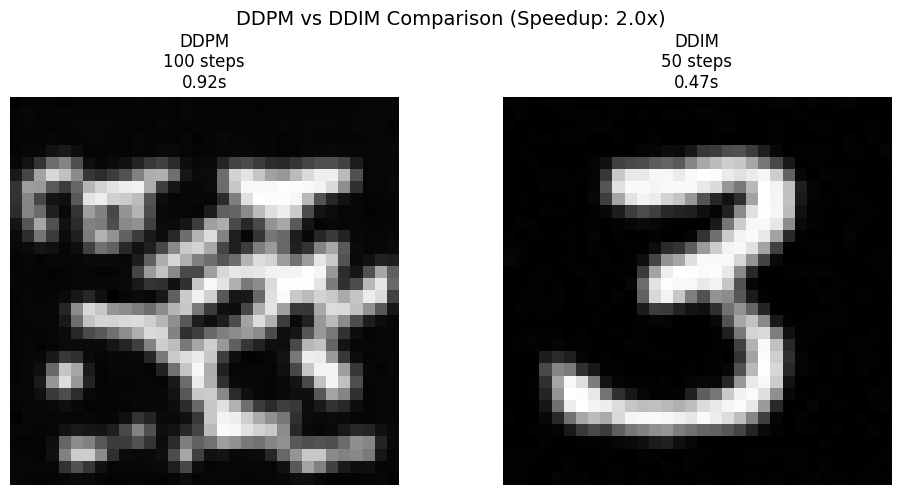

 Comparison saved to 'ddim_comparison.png'


In [7]:
samples, ddim_time, ddpm_time = quick_test()